# **Analyse de sentiments vis à vis d'Emmanuel Macron au cours de l'année 2022.**
**Projet Python - 2A ENSAE**

KAMWA Nathan, DALBARADE Raphaël, LARGITTE Pierre-Eugène

# Introduction

+ **Présentation et Objectif** : On cherche dans ce projet à mener une analyse de sentiments sur Emmanuel Macron. Plus précisément d'être capable de prédire son niveau de popularité en France au cours l'année 2022. Pour mener ce projet à bien on a décidé d'utiliser des données issues de Twitter (des tweets) et d'en extirper le sentiment vis à vis d'Emmanuel Macron. Le but final étant de comparer nos modèles de prédiction de la côte de popularité du président avec des modèles existant déjà et publiés dans de grands journaux. 

+ **Plan du projet** : Le projet est diviser en quatres parties; Première étape :On extrait tout d'abord les données (voir la section *scrapping*). La deuxième étape est celle ou l'on nétoie les données (section *nettoyage*) pour les traiter. On cré alors des features liés au sentiment du tweet et à ses caractéristiques (exemple : combien y a-t-il de points d'exclamation). Pour créer les features liés au sentiments du tweet on utilisera les modèles issues de Vader et Textblob qu'on pourra comparer par la suite. Lors de la troisième étape on commence à analyser les données à travers des statistiques descriptives. Puis, pour finir on modélisera les sentiments vis à vis d'Emmanuel Macron et on visualisera des wordcloud.

In [8]:
#!pip install textblob

In [9]:
#!pip install afinn

In [10]:
#!pip install wordcloud

In [11]:
#!pip install textblob-fr

In [12]:
#!pip install plotly

In [13]:
#!pip install spacy

In [16]:
#!pip install gensim

In [15]:
#!pip install vaderSentiment-fr

In [17]:
#!pip install python-Levenshtein

In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re
import matplotlib
import plotly.express as px
import plotly.express as px
import seaborn as sns
import datetime
from PIL import Image
from afinn import Afinn
from datetime import *
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import nltk
from nltk.corpus import stopwords
from random import random, seed
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm
import scipy
from scipy.stats import chi2_contingency as chi2_contingency
import gensim.corpora as corpora 
from pprint import pprint
import gensim.models
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
#Récupération de la dataframe une fois nettoyée
def recup_clean():
  return pd.read_csv("Nettoyage/df_clean.csv")
df=recup_clean()

In [5]:
df.head()

,Datetime,Tweet,User,like,retweet,Month,Date,sl_clean
0,2022-01-01 00:00:14+00:00,@EmmanuelMacron Il faut aussi autoriser les tr...,Colombe75010,6,0,Jan,2022-01-01,il falloir aussi autoriser traitement curatif ...
1,2022-01-01 00:01:07+00:00,@EmmanuelMacron dixit celui qui ne vit qu’en o...,Tivinn2017,1,0,Jan,2022-01-01,dixit celui voir opposer français Bye bye
2,2022-01-01 00:01:16+00:00,@EmmanuelMacron @Enthoven_R On voit l'efficaci...,DeadMoneyTeam,1,0,Jan,2022-01-01,on voir efficacité vaccin effectivement
3,2022-01-01 00:01:29+00:00,@EmmanuelMacron @BrunoLeMaire bonne année mons...,christine_peres,1,0,Jan,2022-01-01,bon année Monsieur président souhaite tout cœu...
4,2022-01-01 00:01:51+00:00,@EmmanuelMacron On s'en moque que la France pr...,Bakounine2017,1,0,Jan,2022-01-01,on moque France prendre présidence Europe cert...


# I-Création des features

In [6]:
#Fonction comptant le nombre de hashtags présents dans le tweet
def nbre_htag(text):
    exp_match = re.compile("([#]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de mentions présentes dans le tweet
def nbre_tag(text):
    exp_match = re.compile("([@]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de points d'exclamations présents dans le tweet
def nbre_exclamation(text):
    exp_match = re.compile("(\w?\s?[!])")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de liens présents dans le tweet
def nbre_mail(text):
    exp_match = re.compile("(\w+[@]\w+[.]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de points d'interrogations présents dans le tweet
def nbre_interrogation(text):
    exp_match = re.compile("(\w?\s?[?])")
    res = exp_match.findall(text)
    return len(res)



In [7]:
df["nbre_htag"] = df["Tweet"].apply(lambda x : nbre_htag(x))
df["nbre_tag"] = df["Tweet"].apply(lambda x : nbre_tag(x))
df["nbre_mail"] = df["Tweet"].apply(lambda x : nbre_mail(x))
df["nbre_exclamation"] = df["Tweet"].apply(lambda x : nbre_exclamation(x))
df["nbre_interrogation"] = df["Tweet"].apply(lambda x : nbre_interrogation(x))

In [8]:
df.head()

,Datetime,Tweet,User,like,retweet,Month,Date,sl_clean,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation
0,2022-01-01 00:00:14+00:00,@EmmanuelMacron Il faut aussi autoriser les tr...,Colombe75010,6,0,Jan,2022-01-01,il falloir aussi autoriser traitement curatif ...,0,1,0,0,0
1,2022-01-01 00:01:07+00:00,@EmmanuelMacron dixit celui qui ne vit qu’en o...,Tivinn2017,1,0,Jan,2022-01-01,dixit celui voir opposer français Bye bye,0,1,0,0,0
2,2022-01-01 00:01:16+00:00,@EmmanuelMacron @Enthoven_R On voit l'efficaci...,DeadMoneyTeam,1,0,Jan,2022-01-01,on voir efficacité vaccin effectivement,0,2,0,0,0
3,2022-01-01 00:01:29+00:00,@EmmanuelMacron @BrunoLeMaire bonne année mons...,christine_peres,1,0,Jan,2022-01-01,bon année Monsieur président souhaite tout cœu...,0,2,0,0,0
4,2022-01-01 00:01:51+00:00,@EmmanuelMacron On s'en moque que la France pr...,Bakounine2017,1,0,Jan,2022-01-01,on moque France prendre présidence Europe cert...,0,1,0,0,0


### Création des features liés au sentiment (polarité, score, nature du sentiment)

Les deux fonctions qui suivent permettent de codifier par 1 tout sentiment positif, par 0 un sentiment neutre et -1 un sentiment négatif émanant du tweet. 

In [9]:
def tweet_sen(pol):
    if pol> 0 :
        return "positif"
    if pol< 0 :
        return "negatif"
    return "neutre"

def tweet_label(pol):
    if pol> 0 :
        return 1
    if pol< 0 :
        return -1
    return 0

On utilise d'abord le package **textblob** qui renvoie deux valeurs dont la polarité qui est positive pour un sentiment positif, nulle pour un sentiment neutre et négative pour un sentiment négatif. La seconde valeur représente la subjectivité de l'analyse. Plus elle est proche de 0 et plus l'analyse est objective. Dans notre étude on ne s'intéressera qu'à la première valeur renvoyée car on ne se soucie pas de l'objectivité du tweet, en effet on cherche au contraire à récolter une opinion générale.

In [10]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
def tb_pol(text):
    return tb(text).sentiment[0]

On utilise maintenant le package **vader** qui utilise une liste de caractéristiques lexicales (par exemple un mot) qui sont étiquetées comme positives ou négatives selon leur orientation sémantique pour calculer le sentiment du texte.
Le sentiment Vader renvoie la probabilité qu'une phrase d'entrée donnée soit positive, négative et neutre.
On utilise ici la valeur de **compound** qui est également renvoyé par vader, valant plus de 0 si la phrase est considéré comme positive, moins de 0 si elle est considérée comme négative et 0 si on la considère neutre.

In [11]:
sid = SentimentIntensityAnalyzer()
def sid_pol(text):
  return sid.polarity_scores(text)['compound']

In [36]:
df['tb_pol']=df['Tweet'].apply(lambda x: tb_pol(x))
df['var_pol']=df['Tweet'].apply(lambda x: sid_pol(x))
df['tb_sen']=df['tb_pol'].apply(lambda x: tweet_sen(x))
df['var_sen']=df['var_pol'].apply(lambda x: tweet_sen(x))
df['tb_score']=df['tb_pol'].apply(lambda x: tweet_label(x))
df['var_score']=df['var_pol'].apply(lambda x: tweet_label(x))
df['day']=df['Date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d').weekday())
df.head()

,Datetime,Tweet,User,like,retweet,Month,Date,sl_clean,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation,tb_pol,var_pol,tb_sen,var_sen,tb_score,var_score,day
0,2022-01-01 00:00:14+00:00,@EmmanuelMacron Il faut aussi autoriser les tr...,Colombe75010,6,0,Jan,2022-01-01,il falloir aussi autoriser traitement curatif ...,0,1,0,0,0,0.016667,0.5236,positif,positif,1,1,5
1,2022-01-01 00:01:07+00:00,@EmmanuelMacron dixit celui qui ne vit qu’en o...,Tivinn2017,1,0,Jan,2022-01-01,dixit celui voir opposer français Bye bye,0,1,0,0,0,0.200000,0.5707,positif,positif,1,1,5
2,2022-01-01 00:01:16+00:00,@EmmanuelMacron @Enthoven_R On voit l'efficaci...,DeadMoneyTeam,1,0,Jan,2022-01-01,on voir efficacité vaccin effectivement,0,2,0,0,0,0.000000,0.4039,neutre,positif,0,1,5
3,2022-01-01 00:01:29+00:00,@EmmanuelMacron @BrunoLeMaire bonne année mons...,christine_peres,1,0,Jan,2022-01-01,bon année Monsieur président souhaite tout cœu...,0,2,0,0,0,0.306667,0.4939,positif,positif,1,1,5
4,2022-01-01 00:01:51+00:00,@EmmanuelMacron On s'en moque que la France pr...,Bakounine2017,1,0,Jan,2022-01-01,on moque France prendre présidence Europe cert...,0,1,0,0,0,0.196667,0.2486,positif,positif,1,1,5


**Le dictionnaire de variables est le suivant**
+ Datetime : date de publication du tweet avec l'heure du tweet
+ Tweet : Tweet avant le nettoyage
+ User : nom de l'auteur du tweet
+ like : nombre de mentions *j'aime* du tweet
+ retweet : nombre de retweet
+ month : mois de publication du tweet
+ date de publication du tweet en format yyyy-mm-dd
+ sl_clean : texte du tweet nettoyé
+ nbre_htags = nombre de hashtags comportant le tweet
+ nbre_tags = nombre de mentions comportant le tweet
+ nbre_mails = nombres de liens comportant le tweet
+ nbre_exclamation = nombre de points d'exclamation comportant le tweet
+ nbre_interrogation = nombre de points d'interrogation comportant le tweet 
+ tb_pol : score de polarité du tweet affiché par TextBlob
+ var_pol : score de polarité du tweet affiché par Vader
+ tb_sen : sentiment du tweet en format *positif, negatif, neutre* par TextBlob
+ var_sen : sentiment du tweet en format *positif, negatif, neutre* par Vader
+ tb_score : sentiment du tweet qui vaut 1 si positif, 0 si neutre et -1 sinon par TextBlob
+ var_score : sentiment du tweet qui vaut 1 si positif, 0 si neutre et -1 sinon par Vader
+ day: entier entre 0 et 6 attribuer au jour de la semaine du lundi au dimanche

# II- Analyse des données

### Statistiques descriptives

In [37]:
round(df.describe(), 3)

,like,retweet,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation,tb_pol,var_pol,tb_score,var_score,day
count,183835.000,183835.000,183835.000,183835.000,183835.000,183835.000,183835.000,183835.000,183835.000,183835.00,183835.000,183835.000
mean,4.286,0.625,0.175,1.224,0.000,0.457,0.388,0.049,-0.025,0.22,-0.083,2.956
std,104.292,10.949,0.705,0.808,0.011,1.389,0.938,0.234,0.473,0.80,0.923,1.960
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.00,-1.000,0.000
25%,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.402,0.00,-1.000,1.000
50%,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,3.000
75%,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.150,0.361,1.00,1.000,5.000
max,31043.000,1772.000,15.000,23.000,3.000,252.000,79.000,1.000,0.995,1.00,1.000,6.000


De ce premier tableau descriptif on observe que :
+ En moyenne, le sentiment générale vis à vis de Macron en 2022 est plutôt positif en utilisant TextBlob et négatif si au contraire on utilise Vader. On obtient la même analyse par rapport aux nombres de tweets, avec TextBlob il y a plus de tweets avec des sentiments positifs que négatifs mais c'est l'inverse en utilisant Vader.

In [14]:
df.shape

(183835, 19)

### *Relation entre le type de sentiment et la variable **like***

Dans l'optique de continuer nos statistiques descriptives on se pose pose certaines questions face à ces données:
+ En moyenne, les tweets les plus aimés sont-ils plutôt positif ou négatif?

On répond à cette question ci-dessous en prenant successivement les 5%, 1%, 0.1% tweets les plus aimés.

In [15]:
df[df['like'] >= 8]['User'].count()/df.shape[0]

0.05125248184513286

In [16]:
df[df['like'] >= 59]['User'].count()/df.shape[0]

0.010057932385019175

In [17]:
df[df['like'] >= 492]['User'].count()/df.shape[0]

0.0010063372045584355

In [18]:
df0_05 = df[df['like'] >= 8]
df0_01 = df[df['like'] >= 59]
df0_001 = df[df['like'] >= 492]

In [19]:
df0_05.describe()

,like,retweet,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation,tb_pol,var_pol,tb_score,var_score
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.0,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,74.687752,10.596476,0.266928,1.215453,0.0,0.495436,0.441201,0.059745,-0.029406,0.267671,-0.082679
std,454.965850,47.237637,0.824067,0.661834,0.0,1.167134,0.968396,0.215823,0.501843,0.822085,0.939220
min,8.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,-0.985000,-1.000000,-1.000000
25%,11.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,-0.458800,0.000000,-1.000000
50%,20.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.008333,0.000000,1.000000,0.000000
75%,46.000000,7.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.167500,0.393900,1.000000,1.000000
max,31043.000000,1772.000000,11.000000,13.000000,0.0,16.000000,21.000000,1.000000,0.985300,1.000000,1.000000


In [20]:
df0_01.describe()

,like,retweet,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation,tb_pol,var_pol,tb_score,var_score
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.0,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000
mean,297.916712,40.356409,0.249324,1.201731,0.0,0.423472,0.436993,0.068742,-0.035596,0.295836,-0.075717
std,996.267857,100.973187,0.788191,0.668459,0.0,1.011680,0.919636,0.200834,0.498165,0.814897,0.933793
min,59.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.750000,-0.975000,-1.000000,-1.000000
25%,79.000000,7.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,-0.458800,0.000000,-1.000000
50%,116.000000,15.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.022000,0.000000,1.000000,0.000000
75%,225.000000,32.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.176250,0.380200,1.000000,1.000000
max,31043.000000,1772.000000,11.000000,9.000000,0.0,12.000000,10.000000,1.000000,0.957700,1.000000,1.000000


In [21]:
df0_001.describe()

,like,retweet,nbre_htag,nbre_tag,nbre_mail,nbre_exclamation,nbre_interrogation,tb_pol,var_pol,tb_score,var_score
count,185.000000,185.000000,185.000000,185.000000,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1699.583784,221.832432,0.178378,0.897297,0.0,0.232432,0.454054,0.066909,0.041657,0.313514,0.075676
std,2773.781040,247.778958,0.672089,0.647103,0.0,0.585167,1.088126,0.193144,0.501391,0.820313,0.899700
min,492.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.710000,-0.968600,-1.000000,-1.000000
25%,619.000000,60.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,-0.340000,0.000000,-1.000000
50%,916.000000,129.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.036667,0.000000,1.000000,0.000000
75%,1913.000000,300.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.170000,0.438900,1.000000,1.000000
max,31043.000000,1772.000000,6.000000,5.000000,0.0,3.000000,10.000000,0.700000,0.895300,1.000000,1.000000


On remarque qu'en calculant les sentiments par TextBlob on obtient le résultat suivant : 
+ Les tweets les plus aimés, plus ils ont tendance à être positifs vis à vis d'Emmanuel Macron.

Avec Vader : 
+ On a pas de différence claire, cependant on observe alors que pour les 0.1% tweets les plus aimés, en moyenne le score faisant état du sentiment vis à vis d'Emmanuel Macron devient positif. Alors qu'on a vu précédemment qu'il était en moyenne négatif en prenant compte de tous les tweets.

On conclut qu'en général les tweets les plus aimés aurait potentiellement plus tendance à avoir un avis positif que la moyenne sur Emmanuel Macron.

#### *Relation entre les types de sentiments et les mois de l'année*

In [22]:
df.groupby("Month")["User"].count()

Month
Apr    14328
Aug     9585
Feb    10015
Jan    19635
Jul    16491
Jun    18974
Mar    17797
May    19299
Nov    20000
Oct    20000
Sep    17711
Name: User, dtype: int64

Le nombre de tweets n'ai pas le même selon le mois de l'année, on ne pourra pas prédire le niveau de popularité d'Emmanuel Macron avec la même précision le mois d'Août (9585 tweets) que le mois de Novembre (20000 tweets) par exemple.

##### Comparaison des relations entre le mois de l'année et successivement Textblob et Vader.

In [23]:
#Avec TextBlob
df.groupby([ "Month", "tb_sen"])["User"].count()

Month  tb_sen 
Apr    negatif    3667
       neutre     4151
       positif    6510
Aug    negatif    2382
       neutre     2874
       positif    4329
Feb    negatif    1988
       neutre     3320
       positif    4707
Jan    negatif    4790
       neutre     6027
       positif    8818
Jul    negatif    4100
       neutre     4783
       positif    7608
Jun    negatif    4609
       neutre     5759
       positif    8606
Mar    negatif    4341
       neutre     5270
       positif    8186
May    negatif    4186
       neutre     5888
       positif    9225
Nov    negatif    4324
       neutre     6479
       positif    9197
Oct    negatif    4639
       neutre     7196
       positif    8165
Sep    negatif    3964
       neutre     5615
       positif    8132
Name: User, dtype: int64

In [24]:
#Avec Vader 
df.groupby([ "Month", "var_sen"])["User"].count()

Month  var_sen
Apr    negatif    7339
       neutre     1823
       positif    5166
Aug    negatif    4466
       neutre     1253
       positif    3866
Feb    negatif    4237
       neutre     1618
       positif    4160
Jan    negatif    9228
       neutre     3000
       positif    7407
Jul    negatif    7892
       neutre     2275
       positif    6324
Jun    negatif    9308
       neutre     2483
       positif    7183
Mar    negatif    8533
       neutre     2312
       positif    6952
May    negatif    8677
       neutre     2589
       positif    8033
Nov    negatif    8795
       neutre     3225
       positif    7980
Oct    negatif    9778
       neutre     3100
       positif    7122
Sep    negatif    8217
       neutre     2437
       positif    7057
Name: User, dtype: int64

##### Cependant ces formats ne sont pas très lisibles, on va donc construire des graphiques.

#### Sous TextBlob


<Figure size 3000x2000 with 0 Axes>

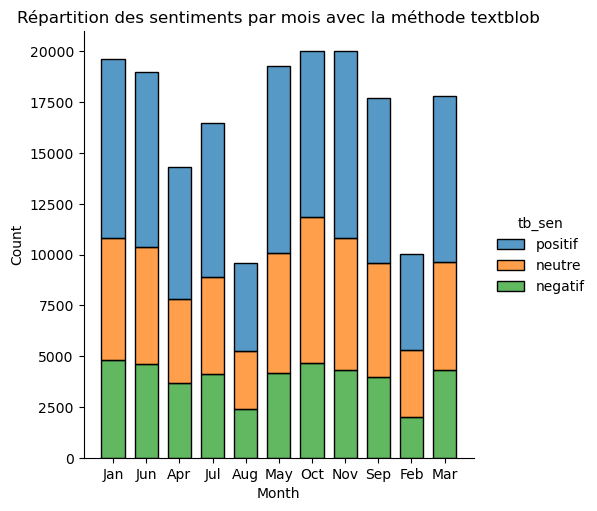

In [25]:
plt.figure(figsize=(30, 20))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("tb_sen", ascending=False), x="Month", hue="tb_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec la méthode textblob")
plt.show()

Pour tous les mois de l'années, les tweets "positifs" sont les plus représentés suivis des tweets "neutres" et enfin des tweets "négatifs". Cette répartition semble identique d'un mois à l'autre, ce qui suggère une indépendance entre le type de sentiment et le mois de l'année. 

#### Sous Vader


<Figure size 4000x700 with 0 Axes>

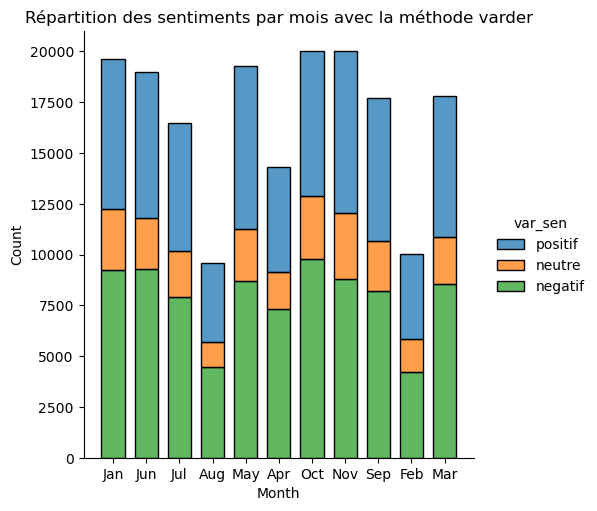

In [26]:
plt.figure(figsize=(40, 7))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("var_sen", ascending=False), x="Month", hue="var_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec la méthode varder")
plt.show()

Pour tous les mois de l'années, les tweets "positifs" sont les plus représentés suivis des tweets "négatifs" et enfin des tweets "neutres". Cette répartition semble identique d'un mois à l'autre, ce qui suggère une indépendance entre le type de sentiment et le mois de l'année. 

#### *Test d'indépendance du Khi-deux*

Il s'agit d'un test qui compare la distribution des modalités de deux variables qualitatives. L'hypothèse du test est l'indépendance entre les deux variables. Cette hypothèse est testée par le calcul de la statistique de Khi-deux qui utilise les effectifs des groupes formés par l'intersection des modalités des variables. Les valeurs critiques sont tabulées et cette statistque est comparée à ces valeurs. L'hypothèse nulle est rejetée si la statistique calculée est supérieure à la valeur critique correspondante. On peut également utiliser la p-valeur qui est comparée à un seuil de significativité. Dans ce cas, l'hypothèse nulle est rejetée si cette p-valeur est inférieure au seuil. 

In [27]:
cont=pd.crosstab(df["tb_sen"],df["Month"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont)
print('statistic: ',khi2, '\nP-value: ',pval ,'\nddl: ', ddl)

def cramers(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = sum(crosstab.sum())
    return np.sqrt(chi2/(n*(min(crosstab.shape)-1)))

statistic:  563.5832604626041 
P-value:  1.3276531709933527e-106 
ddl:  20


In [28]:
cont1=pd.crosstab(df["var_sen"],df["Month"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont1)
print('statistic: ',khi2, '\nP-value: ',pval ,'\nddl: ', ddl)

def cramers(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = sum(crosstab.sum())
    return np.sqrt(chi2/(n*(min(crosstab.shape)-1)))

statistic:  561.9898510277723 
P-value:  2.871196456925424e-106 
ddl:  20


### Interprétation :

Au seuil de 5%, la valeur de la p-value nous indique que l'on peut rejetter l'hypothèse d'indépendance entre les mois de l'année et le type de sentiment d'un tweet de ce mois.

Ce résultat était attendu car il se passe chaque mois des événements différents qui vont affecter différemment la côte de popularité d'Emmanuel Macron.

In [29]:
#test de khi-deux , les variables comparatives à revoir pour l'instant j'ai comparé la colonne des deux sentiments
cont=pd.crosstab(df["tb_sen"],df["var_sen"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont)
print('statistic: ',khi2, '\nP-value: ',pval ,'\nddl: ', ddl)

def cramers(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = sum(crosstab.sum())
    return np.sqrt(chi2/(n*(min(crosstab.shape)-1)))

statistic:  25044.13792021831 
P-value:  0.0 
ddl:  4


#### On s'intéresse maintenant aux relations pouvant exister entre les autres variables et les sentiments d'un tweet.

###### La variable 'retweet'

In [30]:
df01 = df[df['retweet'] <= 300]

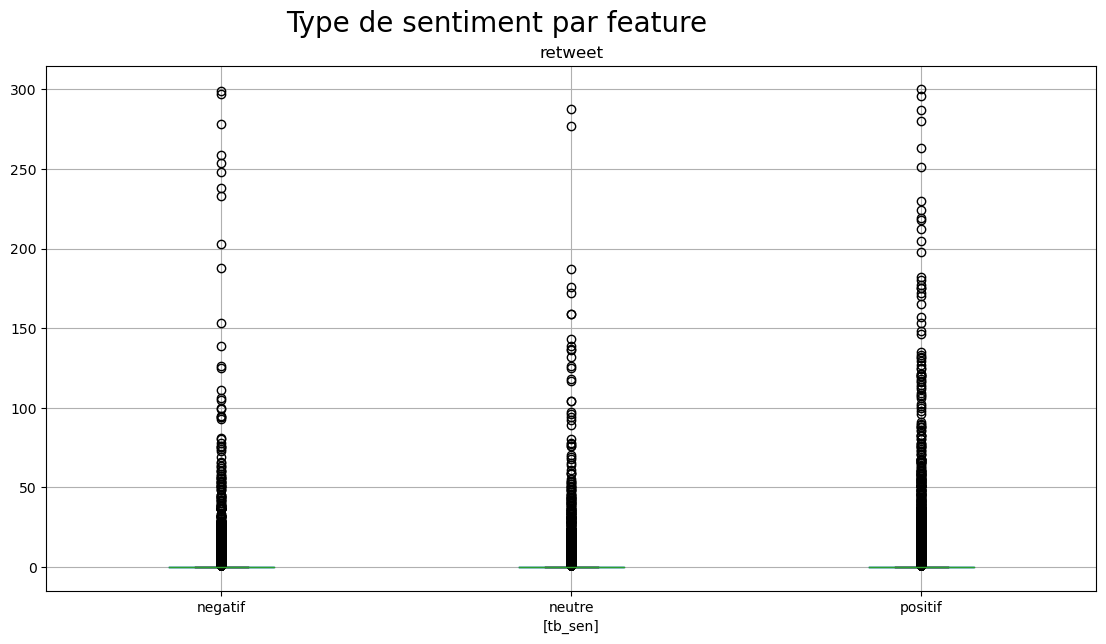

In [31]:
#sentiment par rapport aux autres variables
df1 = df01[["retweet","tb_sen"]]
df1.boxplot(by='tb_sen',figsize=(15,7))
plt.suptitle("Type de sentiment par feature",fontsize=20)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.9)
plt.show()

## Interprétation :



#### Les variables 'nbre_exclamation', 'nbre_interrogation', 'nbre_htag' et 'nbre_tag'.

In [32]:
df3 = df[df['nbre_exclamation'] <= 25]
df4 = df3[df3['nbre_interrogation'] <= 25]
df5 = df4[df4['nbre_htag'] <= 25]
df6 = df5[df5['nbre_tag'] <= 25]

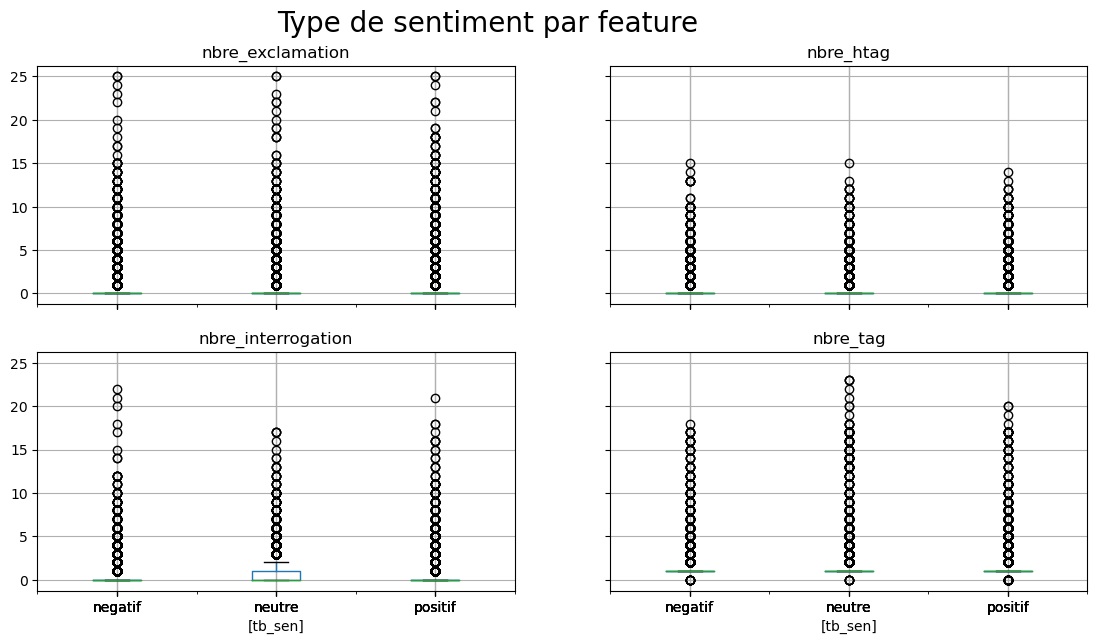

In [33]:
df2 = df6[["tb_sen", "nbre_htag", "nbre_tag", "nbre_exclamation", "nbre_interrogation"]]
df2.boxplot(by='tb_sen',figsize=(15,7))
plt.suptitle("Type de sentiment par feature",fontsize=20)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.9)
plt.show()

## Interprétation :

<AxesSubplot: >

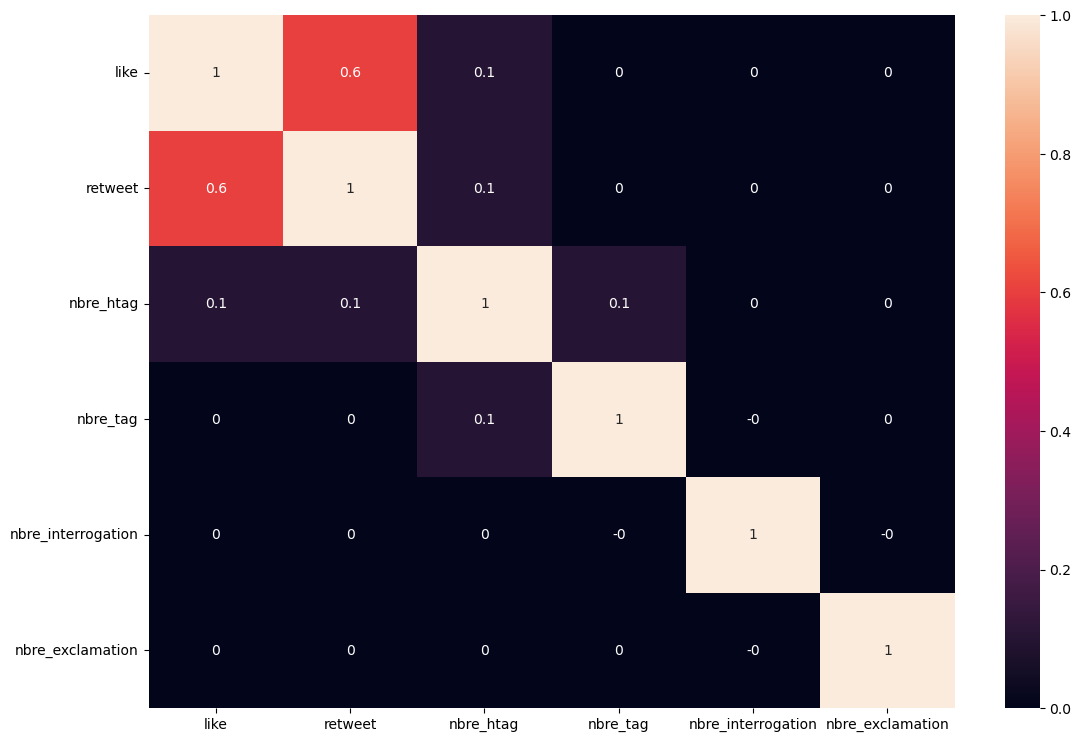

In [34]:
,#matrice de variance covariance
matrice_corr = df[["like", "retweet" , "nbre_htag", "nbre_tag", "nbre_interrogation","nbre_exclamation"]].corr(method='spearman').round(1)
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(data=matrice_corr, annot=True, center=None)

#### Interprétation

Ce résultat était attendu, en effet il était attendu qu'on ait une forte corrélation entre les retweets et le nombre de j'aime mais pas avec les autres variables présentes.

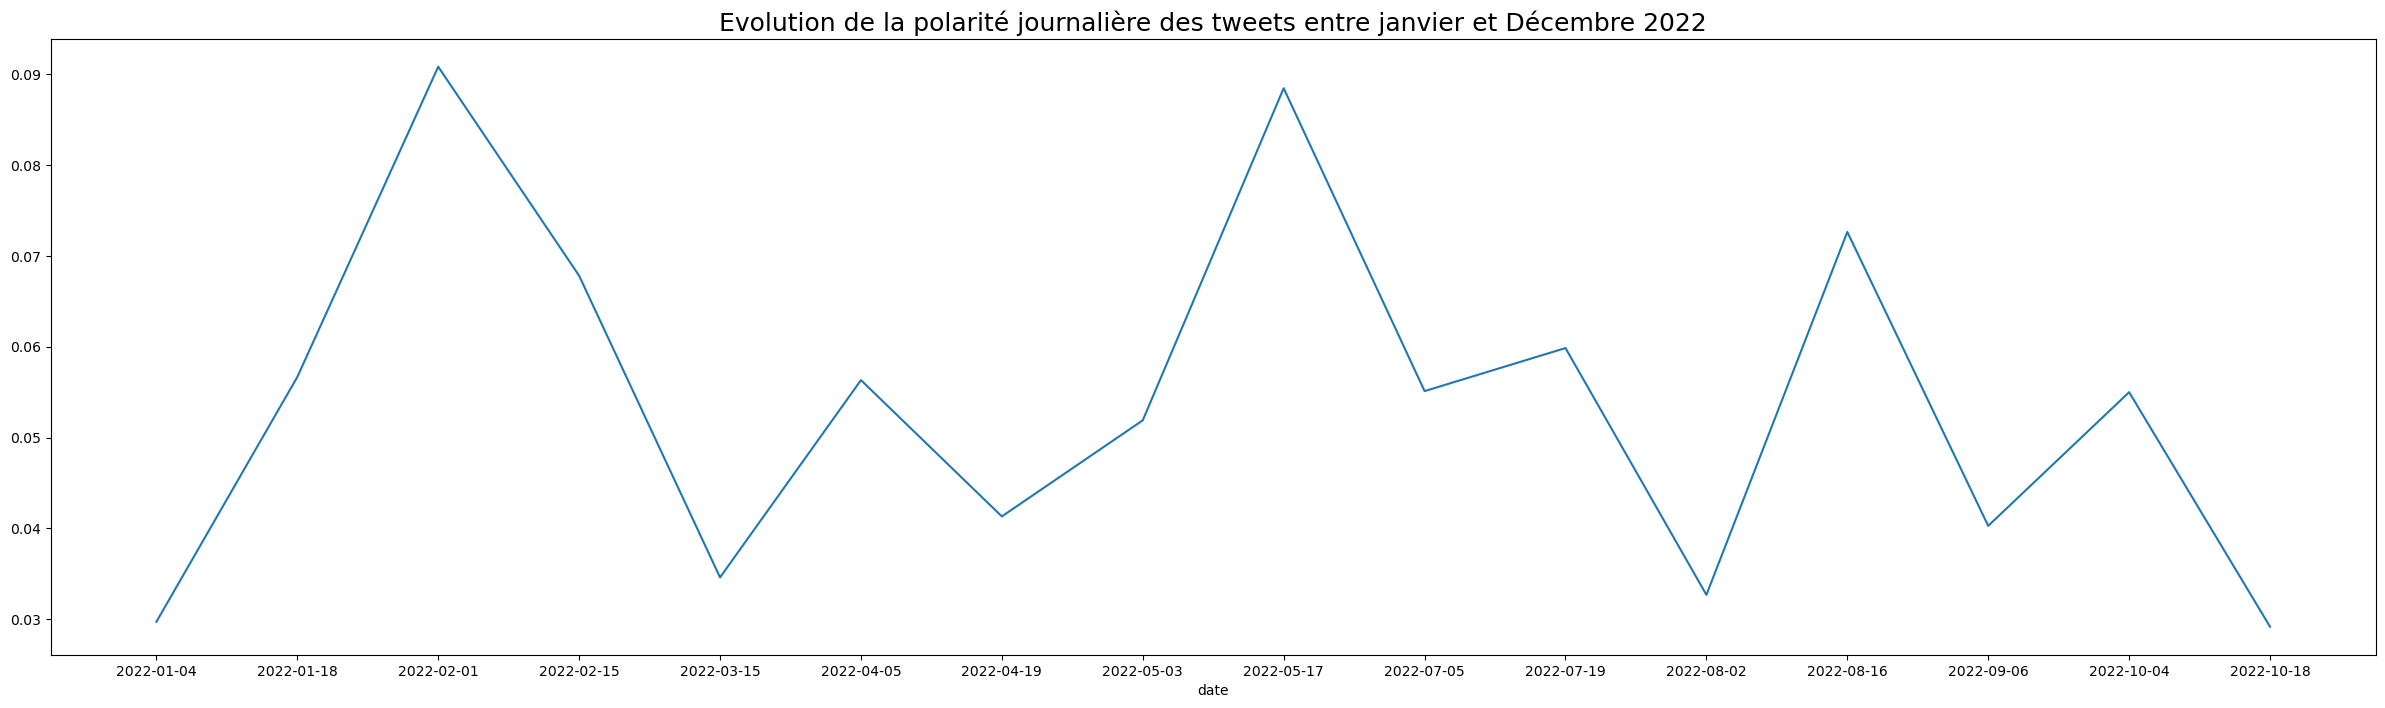

In [38]:
plt.figure(figsize=(30, 8))
plt.xlabel('date')
df1=df[df['day']==1]
df2 = df1[['Date','tb_pol']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de la polarité journalière des tweets entre janvier et Décembre 2022", size=18)
plt.show()

#### Observation :

La polarité varie très peu dans ce cas-là et reste toujours positive.


In [1]:
plt.figure(figsize=(30, 8))
plt.xlabel('date')
df1=df[df['day']==1]
df2 = df1[['Date','var_pol']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de la polarité journalière des tweets entre janvier et Décembre 2022", size=18)
plt.show()

NameError: name 'plt' is not defined

#### Observation :

Dans ce cas-là, la polarité fluctue énormément en 2022 mais reste en moyenne négative comme on l'a vu précédemment.


In [39]:
#affichage des wordclouds
import random

def couleur_rouge(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def couleur_verte(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def couleur_jaune(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

In [40]:


def trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos):
    fig, axes = plt.subplots(1,3, figsize=(25,25))
    
    wordcloud_neg = WordCloud(
                          background_color='white', 
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Reds'
                         ).generate(mots_neg)
    axes[0].imshow(wordcloud_neg.recolor(color_func=couleur_rouge, random_state=3), interpolation='bilinear')
    axes[0].set_title("Sentiment négatif", size=20)
    axes[0].axis("off")

    wordcloud_neu = WordCloud(
                          background_color='white',
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_neu)
    axes[1].imshow(wordcloud_neu.recolor(color_func=couleur_jaune, random_state=3), interpolation='bilinear')
    axes[1].set_title("Sentiment neutre", size=20)
    axes[1].axis("off")

    wordcloud_pos = WordCloud(
                          background_color='white', 
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_pos)
    axes[2].imshow(wordcloud_pos.recolor(color_func=couleur_verte, random_state=3), interpolation='bilinear')
    axes[2].set_title("Sentiment positif", size=20)
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

In [41]:
def plot_wordcloud(df) :
    for month in df["Month"].unique():
      print("sentiment le mois de {} \n".format(month))
      df_cloud = df[df['Month']==month]
      df_pos = df_cloud[df_cloud['tb_score']==1]['sl_clean']
      mots_pos = ' '.join([str(word) for word in df_pos])
    
      df_neg = df_cloud[df_cloud['tb_score']==-1]['sl_clean']
      mots_neg = ' '.join([str(word) for word in df_neg])
    
      df_neu = df_cloud[df_cloud['tb_score']==0]['sl_clean']
      mots_neu = ' '.join([str(word) for word in df_neu])
    
      trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos)


sentiment le mois de Jan 



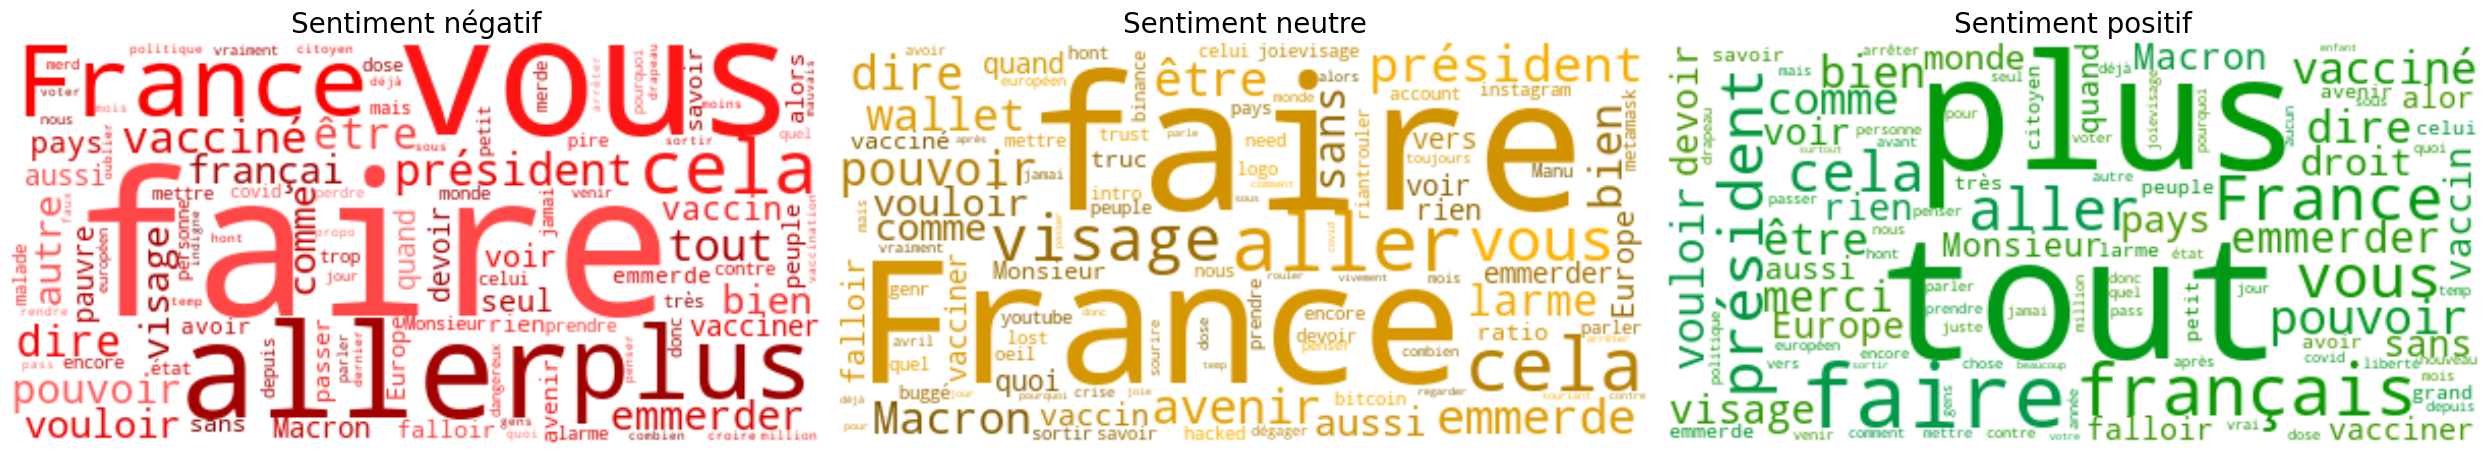

sentiment le mois de Feb 



In [ ]:
plot_wordcloud(df)

In [ ]:
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
df['tb_opinion']=[ 1 if(x==1) else 0 for x in df['tb_score']]
df1=df[df['day']==1]
df2 = df1[['Date','tb_opinion']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion journalière avec textblob", size=18)
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
plt.xlabel('Date')
df['var_opinion']=[ 1 if(x==1) else 0 for x in df['var_score']]
df1=df[df['day']==1]
df2 = df1[['Date','var_opinion']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion journalière avec varder", size=18)
plt.show()

In [ ]:
#Nouveau modèle

sentiment_map = pd.read_csv("w2v/kmeans/dict_sentiment.csv")
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

def get_ifidf_for_words(tfidf,tweet,feature_names):
    tfidf_matrix= tfidf.transform([tweet]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    dictionary= dict(tfidf_scores)
    return (lambda x: list(map(lambda y: replace_sentiment_words(y, dictionary), x.split())))(tweet)
    
def get_ifidf_for_words(tfidf,tweet,feature_names):
    tfidf_matrix= tfidf.transform([tweet]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    dictionary= dict(tfidf_scores)
    return (lambda x: list(map(lambda y: replace_sentiment_words(y, dictionary), x.split())))(tweet)

def replace_sentiment_words(word, sentiment_dict):
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out
    
def evolution(df):
  opinion=[]
  nbre_opinion=pd.DataFrame({"mois":[],"sentiment":[]})
  tweets=df['sl_clean'].copy()
  tweets=tweets.astype('str')
  tweets=pd.DataFrame([tweet.encode('utf-8').decode() for tweet in tweets]).squeeze()


    
  tfidf = TfidfVectorizer()
  tfidf.fit(tweets)
  feature_names = tfidf.get_feature_names()
    
  replaced_tfidf_scores=tweets.apply(lambda tweet : get_ifidf_for_words(tfidf,tweet,feature_names))
    
  replaced_closeness_scores = tweets.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

  replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, tweets]).T
  replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']
  replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
  replacement_df['sentiment_rate'] = [1 if i>0 else 0 for i in replacement_df['sentiment_rate']]
  replacement_df['sentiment'] = ["positive" if i==1 else "negative" for i in replacement_df['sentiment_rate']]

  df['w2v_score']=replacement_df['sentiment_rate']
  df['w2v_sen']=replacement_df['sentiment']


In [ ]:
evolution(df)

In [ ]:
plt.figure(figsize=(30, 20))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("w2v_sen", ascending=False), x="Month", hue="w2v_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec notre modèle")
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
plt.xlabel('Date')
df1=df[df['day']==1]
df2 = df1[['Date','w2v_score']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion avec notre modélisation", size=18)
plt.show()

In [ ]:
###partie classification
# Création d'un dataframe qui équilibre les tweets par label (même nobre de tweets pour chaque label) par tirage aléatoire
df_class = df[['tb_score','like', 'retweet', 'nbre_htag', 'nbre_tag', 'nbre_exclamation', 'nbre_interrogation']]

positif = df_class[df['tb_score']==1]

neutre = df_class[df['tb_score']==0]

negatif = df_class[df['tb_score']==-1]

taille=min(df["tb_score"].groupby(df["tb_score"]).count())
A = positif.sample(n=taille, 
                   frac=None,
                   replace=False,
                   weights=None,
                   random_state=None,
                   axis=None)

B= neutre.sample(n=taille, 
                  frac=None,
                  replace=False,
                  weights=None,
                  random_state=None,
                  axis=None)
C= negatif.sample(n=taille, 
                  frac=None,
                  replace=False,
                  weights=None,
                  random_state=None,
                  axis=None)

base_model = pd.concat([A, B, C], ignore_index=True)



In [ ]:
#creation des données de test et entraînement
X_train, X_test, y_train, y_test = train_test_split(base_model[['like', 'retweet', 'nbre_htag', 'nbre_tag', 'nbre_exclamation', 'nbre_interrogation']],base_model['tb_score'],
                     test_size=0.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


In [ ]:
###Support Vector Machine
classifier = SVC(kernel ='linear', random_state = 0)
X_svm_train=X_train[:10000]
y_svm_train=y_train[:10000]
classifier.fit(X_svm_train, y_svm_train)
X_svm_test=X_test[:10000]
y_pred = classifier.predict(X_svm_test)
y_svm_test=y_test[:10000]


In [ ]:
matrice_confusion = pd.DataFrame(confusion_matrix(y_svm_test, y_pred), index=["Negatif", "Neutre", "Positif"], columns=["predicted_negatif", "predicted_neutre", "predicted_positif"])
matrice_confusion

In [ ]:
print(classification_report(y_svm_test, y_pred))

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test) 


In [ ]:
matrice_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Negatif", "Neutre", "Positif"], columns=["predicted_negatif", "predicted_neutre", "predicted_positif"])
matrice_confusion

In [ ]:
print(classification_report(y_test, y_pred))